<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [1]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, make_scorer

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [2]:
#Nombres de las columnas
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Leer el archivo csv
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, delimiter=r"\s+", names=column_names)
print("Conjunto de datos:")
display(df.head(5))

# Muestra el número y nombre de los atributos
print("\nNúmero de atributos:", len(df.columns))
# Muestra el número de filas del conjunto de datos
print("\nNúmero de filas:", len(df))
#Nombre de los atributos
print("\nNombres de atributos:")
display(pd.DataFrame(df.columns.tolist()).T)


# Verifica si hay "missing values" y en qué columnas
print("\nValores faltantes por columna:")
missing_values = df.isnull().sum()
display(missing_values.to_frame().T)

Conjunto de datos:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



Número de atributos: 14

Número de filas: 506

Nombres de atributos:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV



Valores faltantes por columna:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>



Análisis de la variable categórica: CHAS


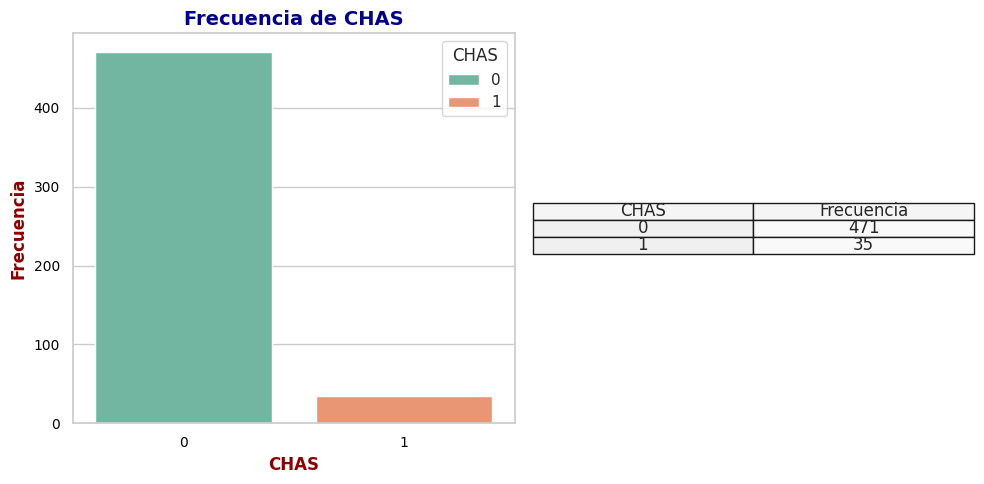


Análisis de la variable categórica: RAD


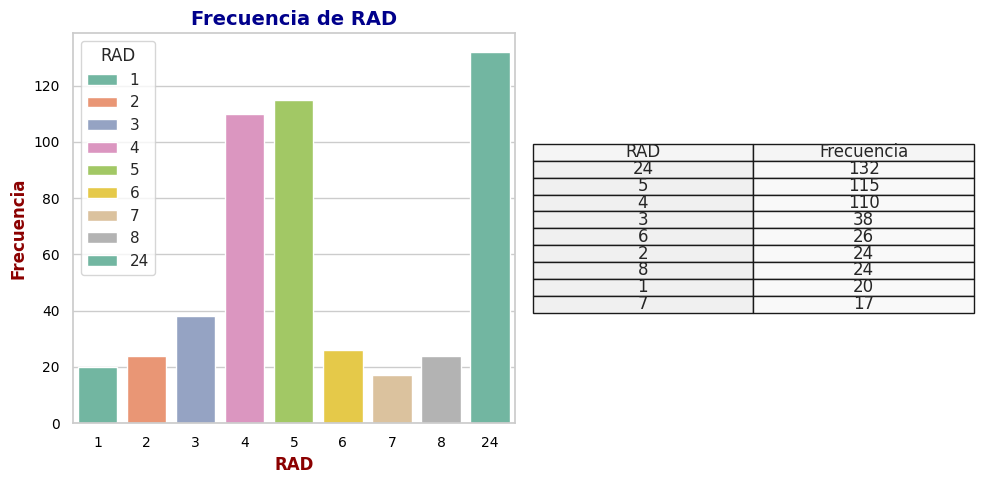

In [3]:
sns.set(style="whitegrid")

# Variables categóricas
categorical_cols = ['CHAS', 'RAD']

# Crear un gráfico para cada variable categórica
for col in categorical_cols:
    print(f"\nAnálisis de la variable categórica: {col}")

    # Crear la figura y los subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

    # Gráfico de barras con `hue` como el nombre de la columna
    sns.countplot(x=col, data=df, ax=ax1, hue=col, palette='Set2')
    ax1.set_title(f'Frecuencia de {col}', fontsize=14, fontweight='bold', color='darkblue')  # Título más atractivo
    ax1.set_xlabel(col, fontsize=12, fontweight='bold', color='darkred')  # Etiqueta X más clara
    ax1.set_ylabel('Frecuencia', fontsize=12, fontweight='bold', color='darkred')  # Etiqueta Y más clara
    ax1.tick_params(axis='both', labelsize=10, colors='black')  # Personalizar tamaño y color de las etiquetas de los ejes

    # Tabla de frecuencias
    freq_table = df[col].value_counts()
    ax2.axis('off')  # Desactivar el eje del gráfico para la tabla
    ax2.table(cellText=freq_table.reset_index().values,
              colLabels=[col, 'Frecuencia'],
              cellLoc='center', loc='center',
              colColours=['#f5f5f5'] * 2,  # Color de fondo de las columnas
              cellColours=[['#f0f0f0', '#f9f9f9']] * len(freq_table))  # Alternar colores de las filas para mejorar la legibilidad

    # Mejorar la estética con márgenes y distribución
    plt.tight_layout()  # Asegura que todo esté bien distribuido

    # Mostrar el gráfico
    plt.show()

**Análisis**

* En la variable CHAS existe un desbalance claro en la variables. La distribución desbalanceada podría influir en los modelos predictivos, donde el modelo podría aprender que la clase mayoritaria (0) es más frecuente y, por lo tanto, puede subestimar la clase minoritaria (1).
* En la variable RAD, la mayoría de los datos se encuentran en valores como 5, 4, 24). La baja frecuencia de los valores más extremos (1 y 7).



Estadísticos descriptivos de las variables numéricas:


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000



Histogramas de INDUS, AGE y MEDV:


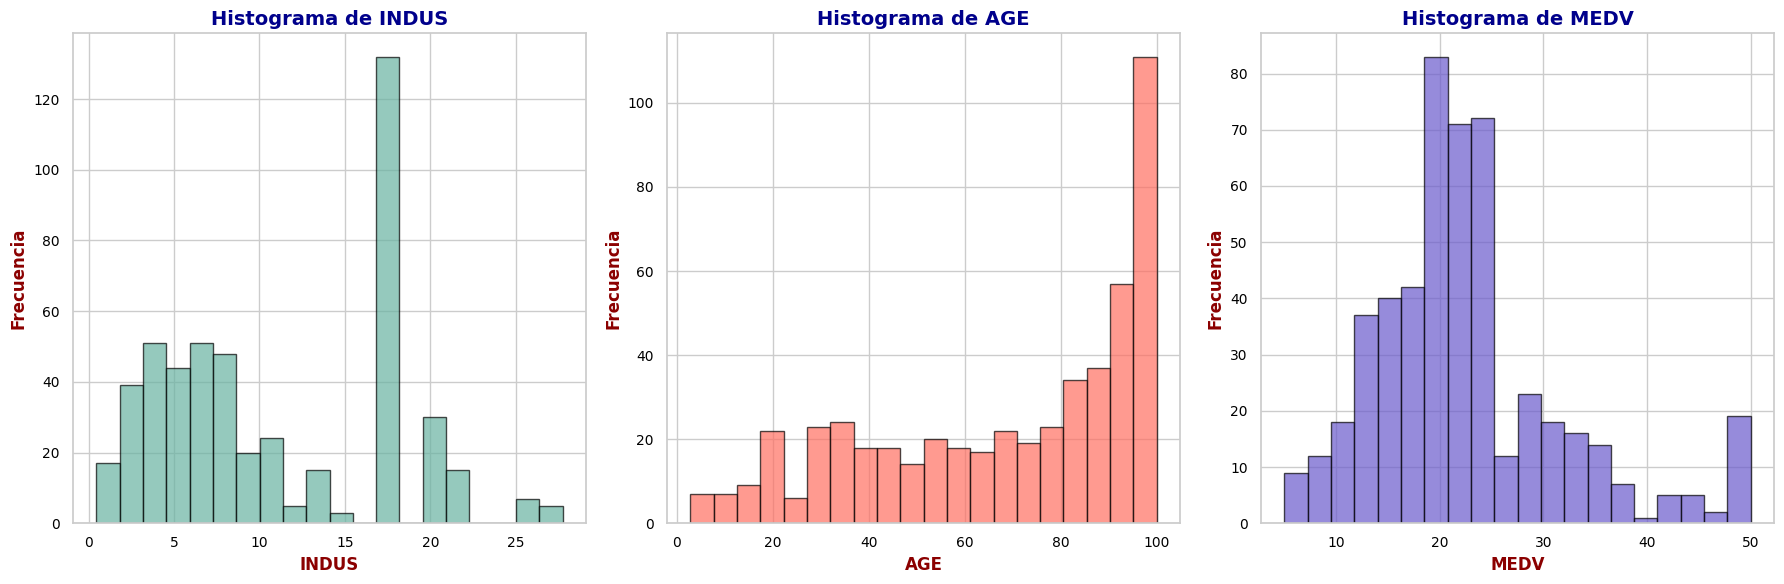

In [4]:
# Análisis de variables numéricas
numerical_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print("\nEstadísticos descriptivos de las variables numéricas:")
display(df[numerical_cols].describe())

# Mejorar el estilo de las gráficas con seaborn
sns.set(style="whitegrid")

# Crear subgráficos para los histogramas de INDUS, AGE y MEDV
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# Colores personalizados
colors = ['#69b3a2', '#ff6f61', '#6a5acd']

# Histogramas para INDUS, AGE, y MEDV
for i, col in enumerate(['INDUS', 'AGE', 'MEDV']):
    axes[i].hist(df[col], bins=20, color=colors[i], edgecolor='black', alpha=0.7)  # Ajuste de color y bordes
    axes[i].set_title(f'Histograma de {col}', fontsize=14, fontweight='bold', color='darkblue')  # Título más atractivo
    axes[i].set_xlabel(col, fontsize=12, fontweight='bold', color='darkred')  # Etiqueta X más clara
    axes[i].set_ylabel('Frecuencia', fontsize=12, fontweight='bold', color='darkred')  # Etiqueta Y más clara
    axes[i].tick_params(axis='both', labelsize=10, colors='black')  # Personalizar tamaño y color de las etiquetas de los ejes

print("\nHistogramas de INDUS, AGE y MEDV:")
# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

* INDUS (Proporción de acres de negocios no minoristas): INDUS tiene una media de 11.14 y una desviación estándar de 6.86, reflejando una distribución amplia de la proporción de terrenos industriales. Los valores van desde 0.46 hasta 27.74, lo que muestra una variabilidad considerable en la presencia de actividad industrial en las distintas zonas.

* AGE (Proporción de viviendas ocupadas por propietarios construidas antes de 1940): AGE tiene una media de 68.57 y una desviación estándar de 28.15, lo que refleja una distribución sesgada hacia valores más altos. Los valores varían entre 2.9 y 100, lo que indica que muchas viviendas en el conjunto de datos son de construcción antigua, aunque también existen áreas con viviendas más recientes.

* MEDV (Valor mediano de la vivienda): MEDV tiene una media de 22.53 y una desviación estándar de 9.20, con un rango entre 5 y 50. Esta variable presenta una distribución sesgada a la derecha, con la mayoría de las viviendas ubicándose en un rango bajo a medio en cuanto a su valor mediano, pero también con algunas viviendas en áreas más exclusivas que tienen valores significativamente más altos.

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

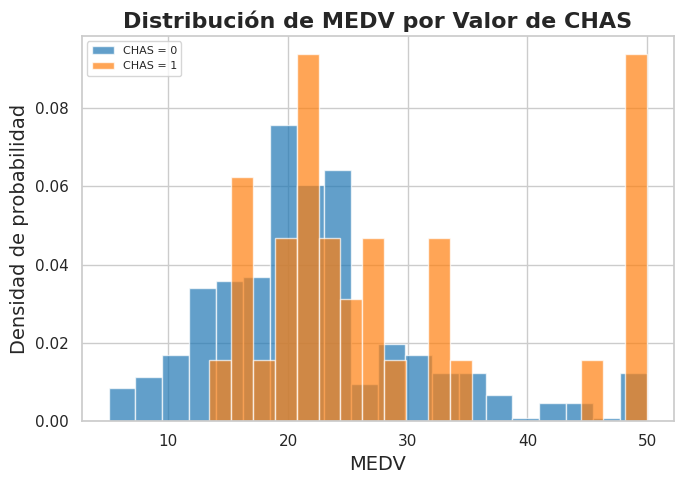

In [5]:
# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(7, 5))

# Colores personalizables y transparencia ajustada
colors = ['#1f77b4', '#ff7f0e']

# Graficar histogramas de MEDV por valor de CHAS
for i, value in enumerate(df['CHAS'].unique()):
    subset = df[df['CHAS'] == value]
    plt.hist(subset['MEDV'], bins=20, alpha=0.7, label=f'CHAS = {value}', density=True, color=colors[i])

# Títulos y etiquetas
plt.title('Distribución de MEDV por Valor de CHAS', fontsize=16, fontweight='bold')
plt.xlabel('MEDV', fontsize=14)
plt.ylabel('Densidad de probabilidad', fontsize=14)

# Leyenda
plt.legend(title_fontsize='10', fontsize='8', loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Sí, CHAS puede tener cierto peso a la hora de predecir la mediana del precio de las casas, pero probablemente no sea el único factor determinante. El atributo tiene una relación moderada con MEDV, y su influencia dependerá de la interacción con otras variables en el modelo predictivo. Esto quiere decir que aunque ambas distribuciones de MEDV para CHAS = 0 y CHAS = 1 presentan un sesgo hacia la derecha, la distribución para CHAS = 1 (cerca del río) muestra valores medianamente más altos en comparación con CHAS = 0 (lejos del río). Esto sugiere que las viviendas cercanas al río tienden a tener un valor más alto en promedio. Las viviendas en áreas sin acceso al río tienen una distribución de precios más dispersa, con valores que van de bajos a altos, pero no tan concentrados en los valores más altos como las viviendas cercanas al río.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [6]:
# Correlación entre las variables numéricas y MEDV
correlation_with_medv = df[numerical_cols].corr()['MEDV']

# Convertir la serie en DataFrame para tenerla en formato horizontal
correlation_df = pd.DataFrame(correlation_with_medv).T

# Mostrar el DataFrame
display(correlation_df)


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,-0.427321,0.69536,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663,1.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


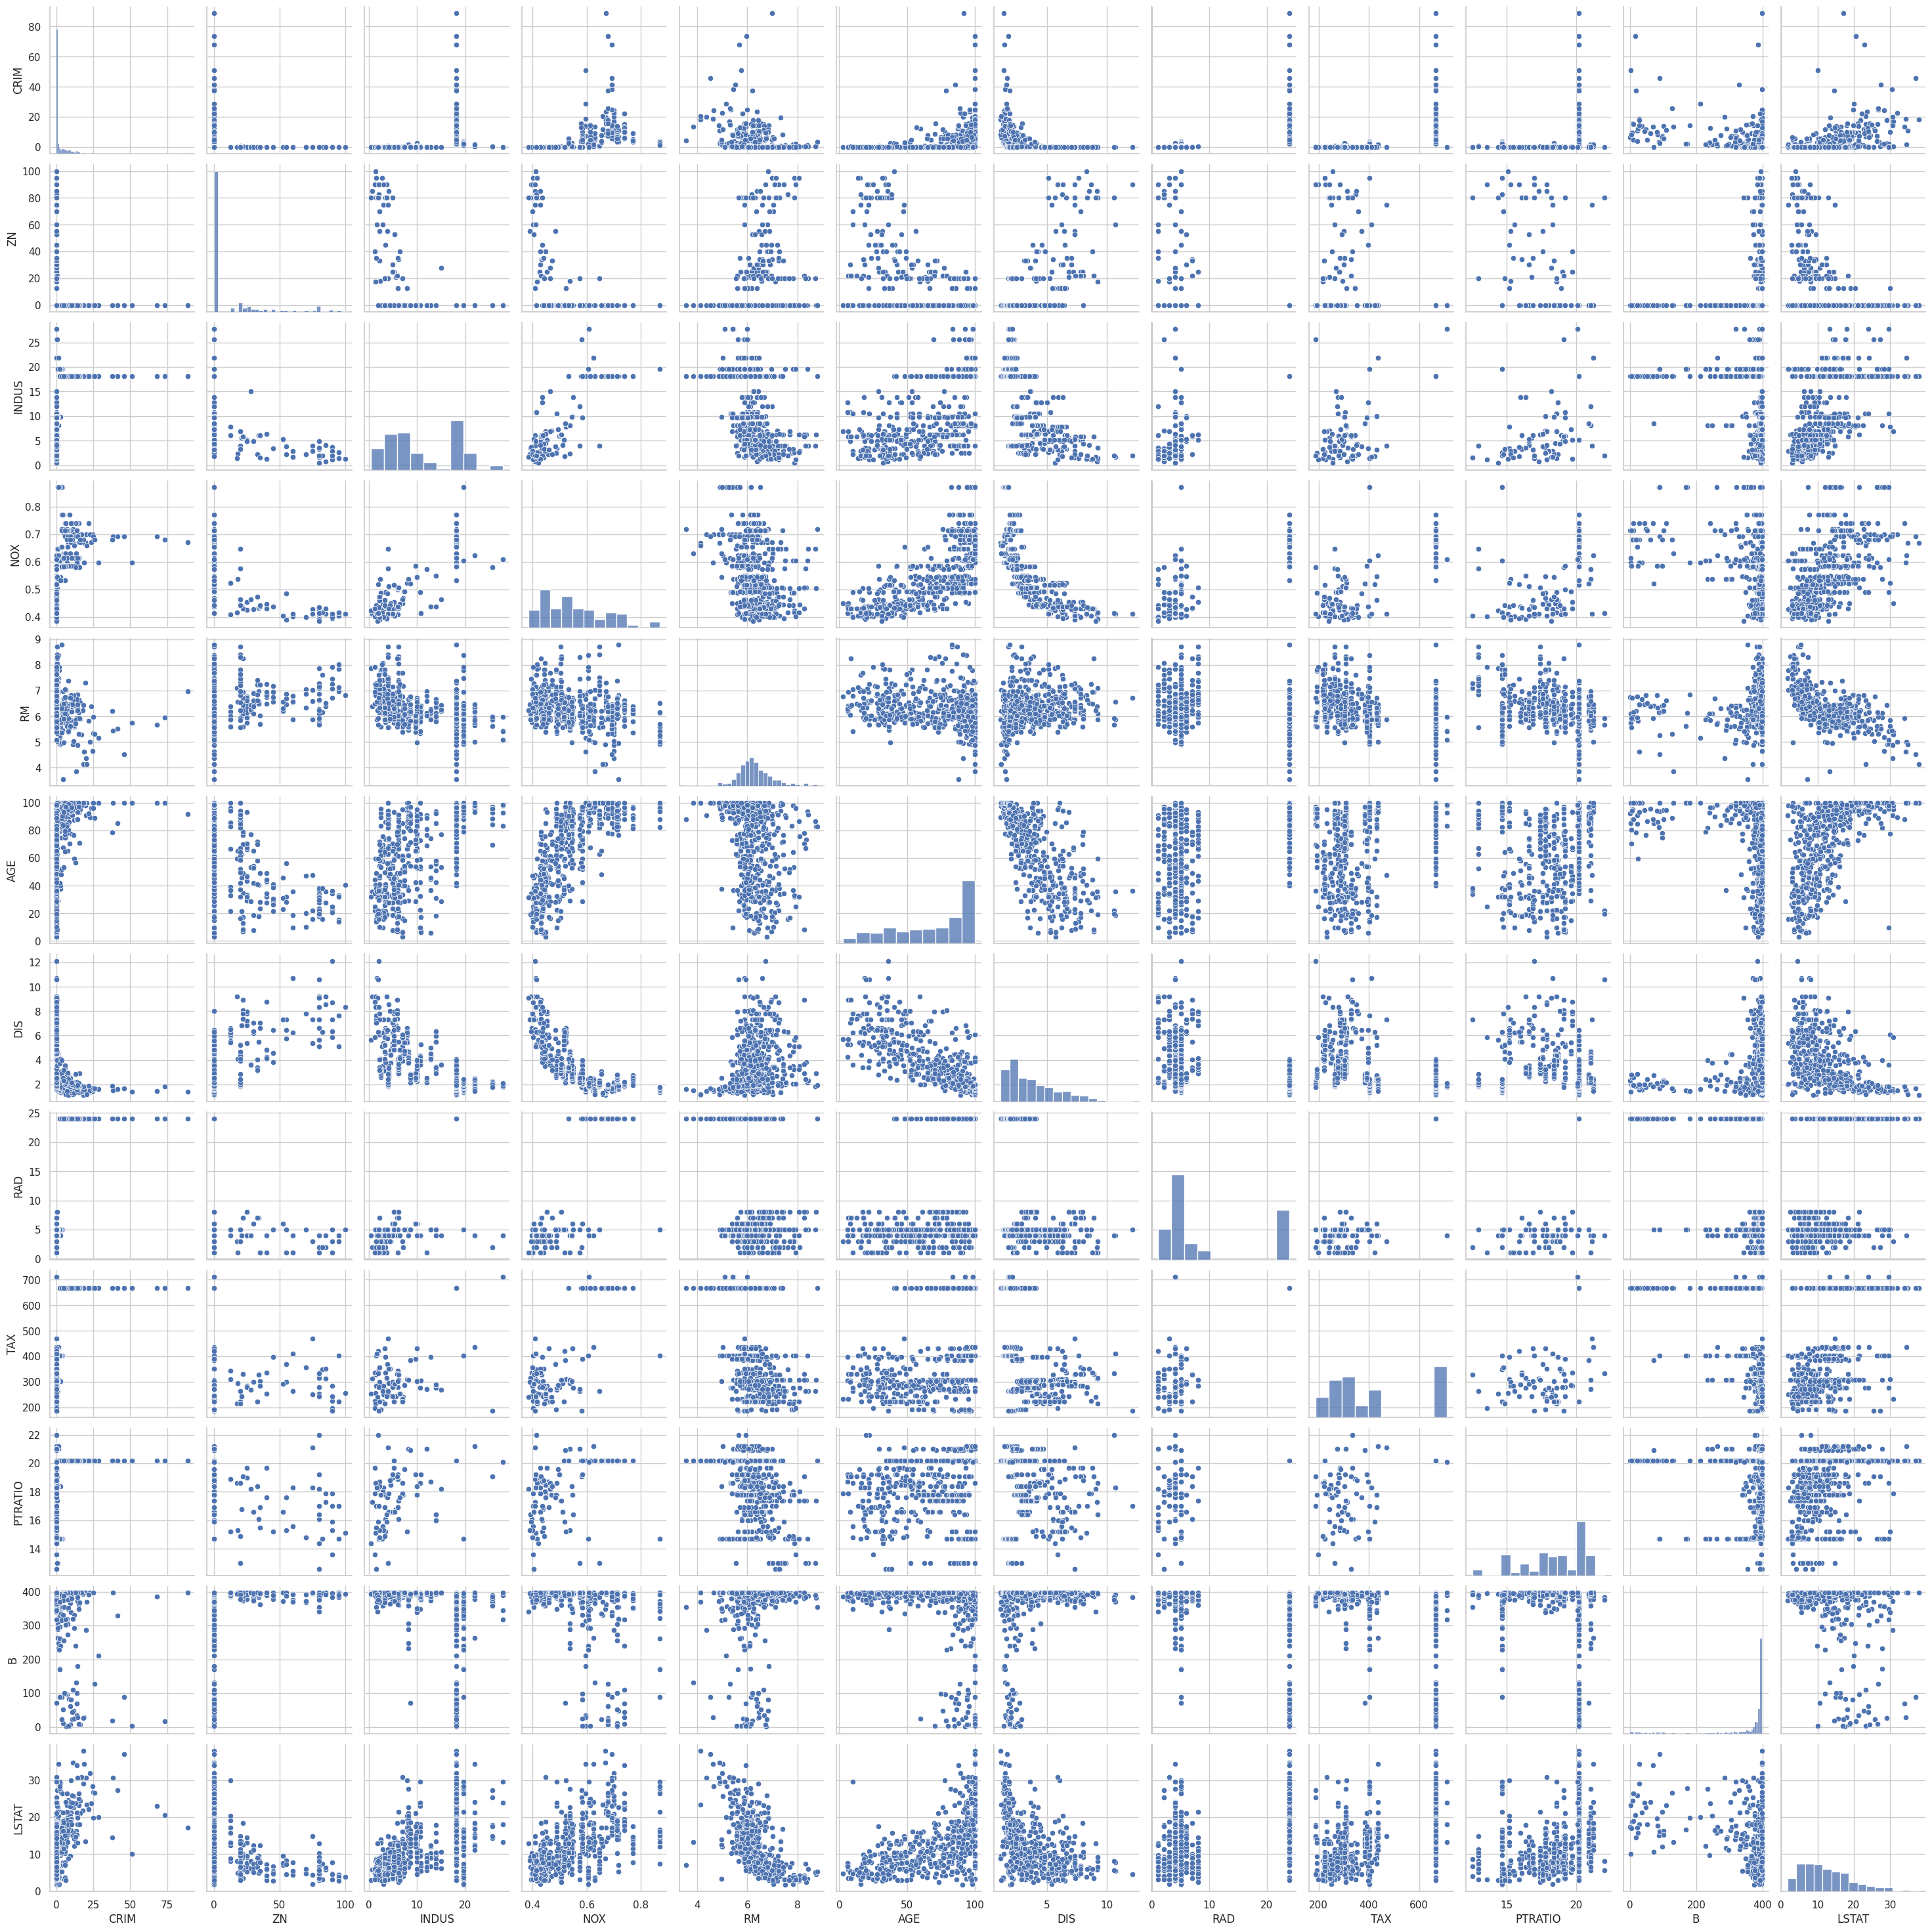

In [7]:
# Selecciona las columnas numéricas excluyendo 'MEDV'
numerical_cols_no_medv = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Crea el pairplot
sns.pairplot(df[numerical_cols_no_medv])
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


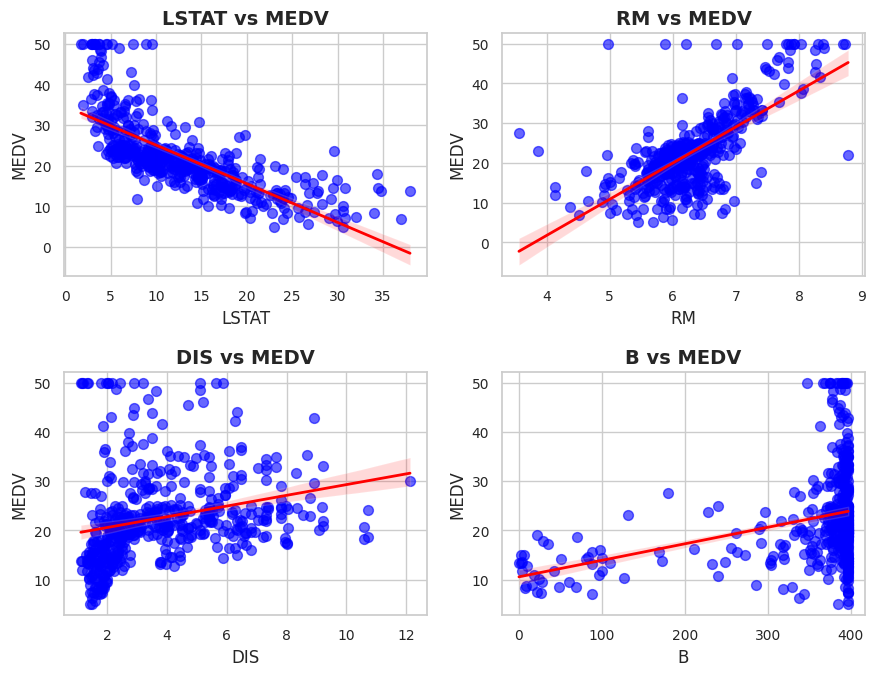


Dos atributos con la correlación más fuerte con MEDV:


,MEDV
LSTAT,0.737663
RM,0.695360



Dos atributos con la correlación más débil con MEDV:


,MEDV
DIS,0.249929
B,0.333461


In [8]:
# Ordenar las correlaciones por valor absoluto y obtener los 2 más fuertes y los 2 más débiles
correlation_with_medv_abs = correlation_with_medv.abs()
strongest_corr = correlation_with_medv_abs.sort_values(ascending=False)[1:3]
weakest_corr = correlation_with_medv_abs.sort_values()[0:2]

# Atributos con la correlación más fuerte y más débil
attributes = strongest_corr.index.tolist() + weakest_corr.index.tolist()

# Crear una figura con 2 filas y 2 columnas para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(9, 7))  # 2 filas, 2 columnas

# Mejorar el estilo de los gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Crear los scatter plots con regresión lineal para los atributos más y menos correlacionados
for i, attr in enumerate(attributes):
    sns.regplot(x=attr, y='MEDV', data=df, ax=axes[i//2, i%2], line_kws={'color': 'red', 'lw': 2}, scatter_kws={'s': 50, 'color': 'blue', 'alpha': 0.6})
    axes[i//2, i%2].set_title(f'{attr} vs MEDV', fontsize=14, fontweight='bold')
    axes[i//2, i%2].set_xlabel(attr, fontsize=12)
    axes[i//2, i%2].set_ylabel('MEDV', fontsize=12)
    axes[i//2, i%2].tick_params(axis='both', labelsize=10)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Mostrar las tablas de correlación con formato bonito
# Correlaciones más fuertes
print("\nDos atributos con la correlación más fuerte con MEDV:")
display(strongest_corr)

# Correlaciones más débiles
print("\nDos atributos con la correlación más débil con MEDV:")
display(weakest_corr)

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


Si se logra visualizar las correlaciones dado que si los puntos siguen una línea recta ascendente indica una correlación positiva alta como es el caso de RM, mientras que si los puntos siguen una línea recta descendente indica una correlación negativa alta como es el caso de LSTAT. Por otro lado, cuando los puntos no se alinean en ninguna dirección específica, la relación entre las variables es prácticamente inexistente o muy débil y si los puntos siguen una línea, pero con mucha dispersión alrededor de ella, esto indica una correlación moderada.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


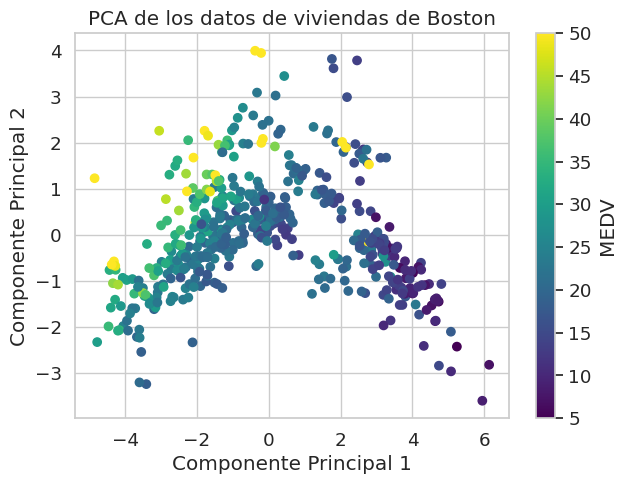

In [9]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear el scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de los datos de viviendas de Boston')
plt.colorbar(label='MEDV')
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


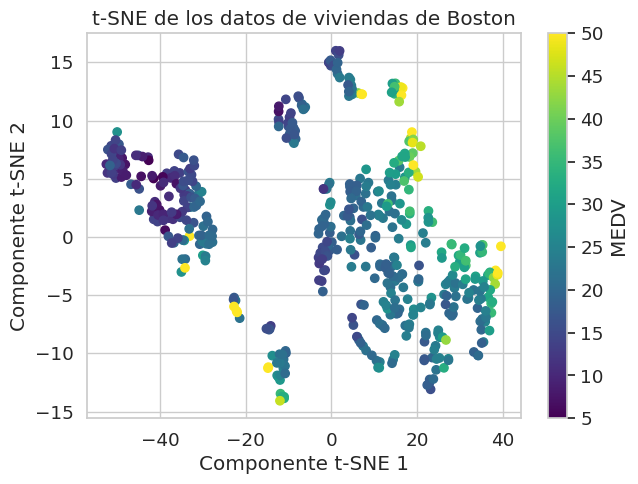

In [10]:
# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Crear el scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('t-SNE de los datos de viviendas de Boston')
plt.colorbar(label='MEDV')
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


* **¿Consideras que la reducción de dimensionalidad ha funcionado adecuadamente?**

Sí, la reducción de dimensionalidad mediante PCA ha funcionado adecuadamente en términos de capturar las relaciones más relevantes entre las variables en dos dimensiones. Sin embargo, no explica perfectamente toda la variabilidad de los precios de las viviendas, ya que la separación entre precios altos y bajos en el gráfico es moderada, y hay cierta dispersión de puntos.

* **¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos?**

En el gráfico de PCA, podemos observar que las dos nuevas dimensiones no logran una separación clara entre los precios altos y bajos de las viviendas. Esto indica que las dos componentes principales no explican completamente la variabilidad de MEDV.

En el gráfico de t-SNE, se puede observar una diferenciación más clara entre los precios altos y bajos. Esto sugiere que t-SNE ha logrado capturar una relación más clara entre las características y los precios.

* **Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?**

Si usáramos las dos nuevas variables para predecir MEDV, t-SNE probablemente proporcionaría mejores resultados. Esto se debe a que t-SNE es un algoritmo no lineal que preserva las relaciones locales en los datos, lo cual es útil cuando hay complejidades no lineales que afectan el precio de las viviendas, algo que no puede capturar PCA. Mientras que PCA es útil para encontrar combinaciones lineales de las variables, t-SNE parece ser más efectivo para capturar la complejidad de las relaciones entre las características y la variable objetivo en este caso.


* **¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?**

PCA tiene un enfoque lineal que no captura toda la complejidad de las relaciones entre las características, mientras que t-SNE, al ser no lineal, tiene una mejor capacidad para modelar y visualizar esas relaciones complejas, lo que explica los resultados diferentes entre ambos métodos.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba para el conjunto de datos original
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.2, random_state=8
)

# Dividir los datos en conjuntos de entrenamiento y prueba para el conjunto de datos reducido con PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=8
)

# Crear un DataFrame para presentar los resultados de manera más bonita
data = {
    'Conjunto de Datos': ['Original (X)', 'Original (X)', 'Original (y)', 'Original (y)',
                          'PCA (X)', 'PCA (X)', 'PCA (y)', 'PCA (y)'],
    'Conjunto de Entrenamiento': [X_train_original.shape[0], X_test_original.shape[0],
                                  y_train_original.shape[0], y_test_original.shape[0],
                                  X_train_pca.shape[0], X_test_pca.shape[0],
                                  y_train_pca.shape[0], y_test_pca.shape[0]],
    'Dimensiones (Filas, Columnas)': [
        X_train_original.shape, X_test_original.shape, y_train_original.shape, y_test_original.shape,
        X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape
    ]
}

# Crear un DataFrame para mostrar los resultados
df_dimensions = pd.DataFrame(data)

# Mejorar la presentación de la tabla
df_dimensions.style.set_properties(**{'text-align': 'center'}) \
                   .set_table_styles([{
                        'selector': 'th',
                        'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]
                    }, {
                        'selector': 'td',
                        'props': [('border', '1px solid #ddd'), ('padding', '8px')]
                    }])\
                   .hide(axis="index")


Conjunto de Datos,Conjunto de Entrenamiento,"Dimensiones (Filas, Columnas)"
Original (X),404,"(404, 13)"
Original (X),102,"(102, 13)"
Original (y),404,"(404,)"
Original (y),102,"(102,)"
PCA (X),404,"(404, 2)"
PCA (X),102,"(102, 2)"
PCA (y),404,"(404,)"
PCA (y),102,"(102,)"


### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [12]:
# Define el modelo de regresión lineal
model = LinearRegression()

# Aplica validación cruzada con R2
r2_scores = cross_val_score(model, X_train_original, y_train_original, cv=5, scoring='r2')

# Aplica validación cruzada con MAE
mae_scores = cross_val_score(model, X_train_original, y_train_original, cv=5, scoring='neg_mean_absolute_error')

# Crear un DataFrame para mostrar los resultados de la validación cruzada
results_data = {
    'Métrica': ['R2', 'R2 (Media)', 'R2 (Desviación Estándar)', 'MAE', 'MAE (Media)', 'MAE (Desviación Estándar)'],
    'Valor': [
        r2_scores,
        np.mean(r2_scores),
        np.std(r2_scores),
        -mae_scores,  # Convertir el valor negativo de MAE
        -np.mean(mae_scores),  # Media de MAE (convertido a positivo)
        np.std(-mae_scores)  # Desviación estándar de MAE (convertido a positivo)
    ]
}

# Crear un DataFrame para mostrar los resultados
df_results = pd.DataFrame(results_data)

# Estilizar la tabla para que sea más bonita y fácil de leer
df_results.style.set_properties(**{'text-align': 'center'}) \
                .set_table_styles([{
                    'selector': 'th',
                    'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]
                }, {
                    'selector': 'td',
                    'props': [('border', '1px solid #ddd'), ('padding', '8px')]
                }])\
                .hide(axis="index")


Métrica,Valor
R2,[0.69456756 0.75666502 0.78747275 0.62715533 0.61092493]
R2 (Media),0.695357
R2 (Desviación Estándar),0.069318
MAE,[3.79481773 3.81978245 3.04310446 3.79130167 2.82738229]
MAE (Media),3.455278
MAE (Desviación Estándar),0.430163


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [13]:
# Define el modelo de regresión lineal
model = LinearRegression()

# Aplica validación cruzada con R2 para PCA
r2_scores_pca = cross_val_score(model, X_train_pca, y_train_pca, cv=5, scoring='r2')

# Aplica validación cruzada con MAE para PCA
mae_scores_pca = cross_val_score(model, X_train_pca, y_train_pca, cv=5, scoring='neg_mean_absolute_error')

# Crear un DataFrame para mostrar los resultados de la validación cruzada
results_data_pca = {
    'Métrica': ['R2 (PCA)', 'R2 (PCA Media)', 'R2 (PCA Desviación Estándar)', 'MAE (PCA)', 'MAE (PCA Media)', 'MAE (PCA Desviación Estándar)'],
    'Valor': [
        r2_scores_pca,
        np.mean(r2_scores_pca),
        np.std(r2_scores_pca),
        -mae_scores_pca,  # Convertir el valor negativo de MAE
        -np.mean(mae_scores_pca),  # Media de MAE (convertido a positivo)
        np.std(-mae_scores_pca)  # Desviación estándar de MAE (convertido a positivo)
    ]
}

# Crear un DataFrame para mostrar los resultados
df_results_pca = pd.DataFrame(results_data_pca)

# Estilizar la tabla para que sea más bonita y fácil de leer
df_results_pca.style.set_properties(**{'text-align': 'center'}) \
                .set_table_styles([{
                    'selector': 'th',
                    'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]
                }, {
                    'selector': 'td',
                    'props': [('border', '1px solid #ddd'), ('padding', '8px')]
                }])\
                .hide(axis="index")


Métrica,Valor
R2 (PCA),[0.45707115 0.50283591 0.55831715 0.2624862 0.07338723]
R2 (PCA Media),0.370820
R2 (PCA Desviación Estándar),0.179011
MAE (PCA),[5.04293694 5.36691117 4.47589969 5.6165103 4.70616064]
MAE (PCA Media),5.041684
MAE (PCA Desviación Estándar),0.416866


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


* **¿Con qué datos ha funcionado mejor el modelo?**

Con los datos originales la media del R² es 0.695 con una desviación estándar de 0.069, lo que indica una buena capacidad predictiva y estabilidad en el modelo y la media del MAE es 3.46, lo cual es relativamente bajo, indicando que las predicciones están bastante cerca de los valores reales. Mientras que con el PCA, la media del R² es solo 0.371, mucho más baja que con los datos originales, lo que indica que el modelo tiene una capacidad predictiva mucho peor al usar solo las 2 componentes principales. y la media del MAE es 5.04, considerablemente más alta que con los datos originales, lo que también refleja un peor desempeño en cuanto a la precisión de las predicciones.

* **¿Tiene sentido el resultado?**

Sí, tiene sentido. La reducción de dimensionalidad a través de PCA elimina información importante, ya que solo retiene las componentes principales que capturan la mayor varianza, pero a costa de perder detalles importantes y complejas relaciones no lineales entre las variables. Como resultado, los modelos entrenados con PCA no tienen el mismo rendimiento predictivo que aquellos entrenados con los datos originales.

* **¿Está alineado con los resultados observados en el ejercicio 3?**

Sí, los resultados están alineados con lo observado en el ejercicio 3. En ese ejercicio, al comparar los métodos de reducción de dimensionalidad (PCA y t-SNE), vimos que PCA no fue tan eficaz para capturar las relaciones entre las características y la variable objetivo MEDV como lo fue t-SNE. En este caso, el modelo también muestra mejor desempeño con los datos originales, lo cual refleja que la reducción de dimensionalidad con PCA ha reducido la capacidad predictiva del modelo al perder información importante.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [14]:
# Entrenar el mejor modelo (datos originales)
model.fit(X_train_original, y_train_original)

# Generar predicciones sobre el conjunto de test
y_pred = model.predict(X_test_original)

# Calcular R2
r2 = r2_score(y_test_original, y_pred)
print(f"R2 en el conjunto de test: {r2}")

# Calcular MAE
mae = mean_absolute_error(y_test_original, y_pred)
print(f"MAE en el conjunto de test: {mae}")

R2 en el conjunto de test: 0.7079627967134546
MAE en el conjunto de test: 3.368941892764696


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


* **¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria?**

El MAE mide el promedio de la diferencia absoluta entre las predicciones y los valores reales, es decir que muestra cuánto se equivoca el modelo, en promedio, al predecir el precio de una casa. A los ejecutivos les interesa cuánto se desvía el valor estimado del precio real, ya que este valor tiene implicaciones directas en las decisiones comerciales y financieras por lo que lo más adecuado es elegir el MAE como métrica de evaluación en este sentido. Si el MAE es bajo, se puede afirmar que las predicciones están cerca del valor real, lo cual es una métrica relevante y comprensible para la toma de decisiones.


* **¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?**  

El R² indica qué porcentaje de la variabilidad de la variable objetivo (MEDV en este caso, el precio de la vivienda) es explicado por el modelo. Un R² alto implica que el modelo es capaz de capturar una buena parte de las relaciones subyacentes en los datos. Por lo que en este contexto es mejor usar el R2 dado que a los analistas les interesa saber cuánta varianza en los datos es explicada por el modelo en comparación con otros modelos. El R² es una métrica estándar que facilita la evaluación de la efectividad del modelo en un contexto matemático o estadístico.



### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [15]:
# Cargar y preprocesar los datos
# 'df' contiene el dataset original
X = df.drop('CHAS', axis=1)  # Usamos todas las columnas menos 'CHAS'
y = df['CHAS']  # 'CHAS' es la variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Escalar los datos (importante para K-means)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo K-means
kmeans = KMeans(n_clusters=2, random_state=8)  # K-means con 2 clusters para la variable binaria 'CHAS'

# Entrenar el modelo K-means
kmeans.fit(X_train_scaled)

# Predecir los clusters para el conjunto de test
y_pred = kmeans.predict(X_test_scaled)

# Evaluar el modelo usando las métricas: Precisión, Sensibilidad y F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Crear un DataFrame para mostrar los resultados
results_data = {
    'Métrica': ['Precisión', 'Sensibilidad', 'F1-score'],
    'Valor': [precision, recall, f1]
}

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results_data)

# Estilizar la tabla para una mejor presentación
df_results.style.set_properties(**{'text-align': 'center', 'font-size': '14px'}) \
                .set_table_styles([{
                    'selector': 'th',
                    'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]
                }, {
                    'selector': 'td',
                    'props': [('border', '1px solid #ddd'), ('padding', '8px')]
                }])\
                .hide(axis="index")

# Mostrar los resultados estilizados
print("Resultados de Evaluación del Modelo K-means:")
display(df_results)


Resultados de Evaluación del Modelo K-means:


,Métrica,Valor
0,Precisión,0.114286
1,Sensibilidad,0.444444
2,F1-score,0.181818


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [16]:
# Cargar y preprocesar los datos
X = df.drop('CHAS', axis=1)  # Usamos todas las columnas menos 'CHAS'
y = df['CHAS']  # 'CHAS' es la variable objetivo

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir el conjunto de datos reducido en entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=8)

# Definir el modelo K-means
kmeans_pca = KMeans(n_clusters=2, random_state=8)  # 2 clusters para la variable binaria 'CHAS'

# Entrenar el modelo K-means con las componentes principales
kmeans_pca.fit(X_train_pca)

# Predecir los clusters para el conjunto de test
y_pred_pca = kmeans_pca.predict(X_test_pca)

# Evaluar el modelo usando las métricas: Precisión, Sensibilidad y F1-score
precision_pca = precision_score(y_test_pca, y_pred_pca)
recall_pca = recall_score(y_test_pca, y_pred_pca)
f1_pca = f1_score(y_test_pca, y_pred_pca)

# Crear un DataFrame para mostrar los resultados
results_data_pca = {
    'Métrica': ['Precisión', 'Sensibilidad', 'F1-score'],
    'Valor': [precision_pca, recall_pca, f1_pca]
}

# Crear un DataFrame con los resultados
df_results_pca = pd.DataFrame(results_data_pca)

# Estilizar la tabla para una mejor presentación
df_results_pca.style.set_properties(**{'text-align': 'center', 'font-size': '14px'}) \
                .set_table_styles([{
                    'selector': 'th',
                    'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]
                }, {
                    'selector': 'td',
                    'props': [('border', '1px solid #ddd'), ('padding', '8px')]
                }])\
                .hide(axis="index")

# Mostrar los resultados estilizados
print("Resultados de Evaluación del Modelo K-means con PCA:")
display(df_results_pca)


Resultados de Evaluación del Modelo K-means con PCA:


,Métrica,Valor
0,Precisión,0.102564
1,Sensibilidad,0.444444
2,F1-score,0.166667


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


* **¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria?**

Para un ejecutivo de una inmobiliaria, lo ideal es usar la precisión. La razón es que la precisión mide la proporción de verdaderos positivos entre todas las predicciones positivas realizadas por el modelo. En este caso, el ejecutivo probablemente estará interesado en cuántas de las viviendas clasificadas como pertenecientes a una determinada categoría realmente son correctas.

* **¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?**

Para un analista matemático, la métrica más adecuada sería el F1-score. El F1-score es una métrica que balancea la precisión y la sensibilidad, y es útil cuando se busca un equilibrio entre no generar demasiados falsos positivos (precisión) y no dejar pasar demasiados falsos negativos (sensibilidad). El analista probablemente estará más interesado en una evaluación equilibrada entre la capacidad del modelo para identificar correctamente las clases positivas y negativas (sin generar demasiados falsos positivos o falsos negativos).

* **¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?**

El modelo está mejor discriminando que acertando, especialmente si observamos la sensibilidad que está bastante alta (0.4444), lo que indica que el modelo es capaz de identificar correctamente una parte de los casos positivos, pero la precisión y el F1-score son bajos.

Esto se interpreta en que el modelo está haciendo un esfuerzo para identificar correctamente a las viviendas relevantes, pero está cometiendo muchos errores de clasificación, es decir, está prediciendo algunas viviendas que no son realmente positivas, lo que lleva a una precisión baja. Entonces, el modelo no está acertando con muchas predicciones correctas. Aunque está identificando algunos de los casos correctos, la cantidad de falsos positivos y falsos negativos sigue siendo significativa, lo que implica que el modelo tiene un margen de mejora considerable en cuanto a su capacidad para acertar en la predicción.